### Wing geometry variables

In [12]:
b = 20
c(x) = 5
alphaL0(x) = 0
alpha(x) = 5 * pi / 180
pi = 3.1415926536
v_infinity = 50
rho = 1.2250
N = 150
#Definition of N: the number of USEFUL points being taken into consideration
#Theta=0 and theta=pi are ignored, as they yield zero lift

### Solve for An's

In [8]:
def five_fifty_one_fixed(N):
    rhs_vector = [0 for i in range(N)]
    eqParts = [[0 for i in range(N)] for i in range(N)]
    #The last column is the RHS, alpha(theta) - alphaL0(theta)
    for row in range(0, N):
        theta = pi * (row + 1)/(N+1) # This gets N non-zero thetas evenly distributed, using pi * row / N would have zero as the first value
        rhs_vector[row] = [alpha(theta) - alphaL0(theta)] # assign last column
        
        for col in range(0, N):
            n = col + 1
            eqParts[row][col] = (2 * b * sin(n * theta)) / (pi * c(theta)) + (n * sin(n * theta)) / sin(theta)

    an_vector = matrix(eqParts).solve_right(matrix(rhs_vector))
    return an_vector

### Solve for gamma(theta)

In [9]:
def gamma(N):
    an_vector = five_fifty_one_fixed(N)
    gamma_per_theta = [0 for i in range(0, N)]
    
    for theta_lcv in range(0, N):
        sum = 0
        theta = pi * (theta_lcv + 1) / (N + 1)
        for i in range(0, N): #i is the loop control variable, n is what we're using in the actual sum
            n = i + 1
            sum = sum + an_vector[i] * sin(n * theta)
        gamma_per_theta[theta_lcv] = sum * 2 * b * v_infinity
    return gamma_per_theta

### Solve for the lift distribution as a function of theta

In [10]:
def lift_finder(N):
    gamma_per_theta = gamma(N)
    lift_vector = []
    for value in gamma_per_theta:
        lift_vector.append(rho * v_infinity * abs(value))
    return (lift_vector)

### Plot the lift as a function of y

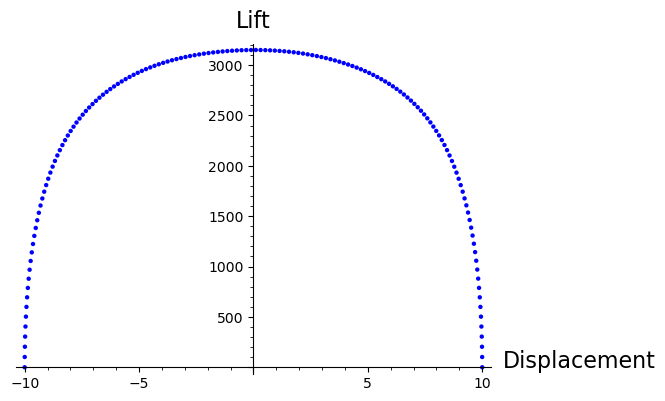

In [16]:
lift_per_y = [0]

lift_vector = lift_finder(N)

for value in lift_vector:
    lift_per_y.append(value)
lift_per_y.append(0)
x_axis_reference = [- b / 2]
for n in range(0, N):
    theta = pi * (n + 1)/(N+1)
    x_axis_reference.append(-b/2*(cos(theta)))

x_axis_reference.append(b/2)

list_plot(list(zip(x_axis_reference, lift_per_y)), axes_labels=['Displacement', 'Lift'])
